# Multiple method comparison on hearts_data

In [1]:
from synthesizers import Load
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[KeOps] Warning : 
    The default C++ compiler could not be found on your system.
    You need to either define the CXX environment variable or a symlink to the g++ command.
    For example if g++-8 is the command you can do
      import os
      os.environ['CXX'] = 'g++-8'
    
[KeOps] Warning : Cuda libraries were not detected on the system or could not be loaded ; using cpu only mode


In [2]:
# Read hearts data
hearts_real = pd.read_csv("Data/hearts_data.csv")
hearts_real = hearts_real.dropna()

target = "target"

gen_methods = ["tvae", "bayesian_network", "privbayes", "adsgan", "ctgan"]

In [3]:
gen_count = hearts_real.shape[0]
# Quick mstz/breast test
state = Load(hearts_real).Synthesize(split_size=0.8, train_plugin=gen_methods, gen_count=gen_count, n_jobs=len(gen_methods), eval_target_col=target)

[2024-05-14T12:33:52.008007+0200][13288][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
 55%|█████▌    | 550/1000 [03:38<02:58,  2.52it/s]
[2024-05-14T12:37:33.786432+0200][13288][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
[2024-05-14T12:37:36.470254+0200][13288][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
100%|██████████| 11/11 [00:11<00:00,  1.06s/it]
[2024-05-14T12:38:06.471016+0200][13288][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
  7%|▋         | 699/10000 [02:44<36:24,  4.26it/s]  
[2024-05-14T12:40:51.154398+0200][13288][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Pytho

In [4]:
state[0].eval

,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.010847,0.002890,0.989153,0.002890
1,pca_eigval_diff,u,0.061458,NaN,0.938542,NaN
2,pca_eigvec_ang,u,0.194701,NaN,0.938025,NaN
3,avg_cio,u,0.197084,0.139527,0.197084,0.139527
4,corr_mat_diff,u,0.465359,NaN,0.992949,NaN
5,mutual_inf_diff,u,1.344916,NaN,0.979622,NaN
6,ks_tvd_stat,u,0.085835,0.018763,0.914165,0.018763
7,frac_ks_sigs,u,0.666667,NaN,0.333333,NaN
8,avg_h_dist,u,0.073767,0.053941,0.926233,0.053941
9,avg_pMSE,u,0.004588,0.000310,0.981649,0.001240


In [5]:
res_df = pd.DataFrame({"Models": gen_methods})

pr_res, ut_res = [], []
for i in range(len(state)):
    pr_res.append(np.mean(state[i].eval[state[i].eval['dim'] == 'p']['n_val']))
    ut_res.append(np.mean(state[i].eval[state[i].eval['dim'] == 'u']['n_val']))

res_df["Utility"] = ut_res
res_df["Privacy"] = pr_res

res_df

,Models,Utility,Privacy
0,tvae,0.804912,0.773855
1,bayesian_network,0.824554,0.744776
2,privbayes,0.739939,0.783313
3,adsgan,0.803931,0.769094
4,ctgan,0.822262,0.762031


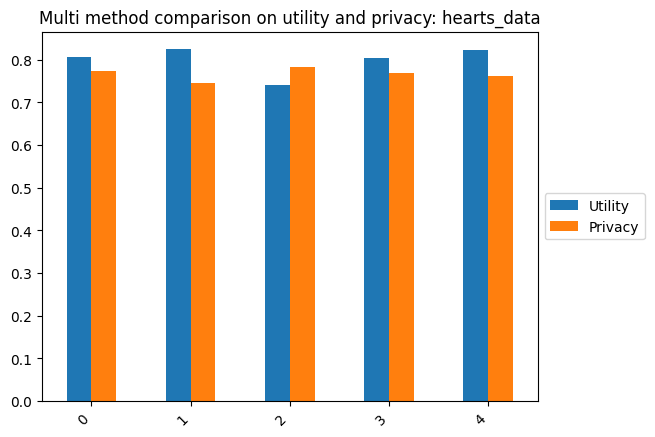

In [6]:
res_df.plot.bar()
plt.title("Multi method comparison on utility and privacy: hearts_data")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [7]:
results_f1 = pd.DataFrame(columns=["f1_diff", "auroc_diff"])

for i in range(len(gen_methods)):
    eval = state[i].eval.set_index("metric")
    results_f1.loc[gen_methods[i]] = [eval.loc["cls_F1_diff", "val"],
                                      eval.loc["auroc", "val"]]
results_f1

,f1_diff,auroc_diff
tvae,0.050438,0.006001
bayesian_network,0.083023,0.006329
privbayes,0.116571,0.063057
adsgan,0.073562,0.020066
ctgan,0.073538,0.004360


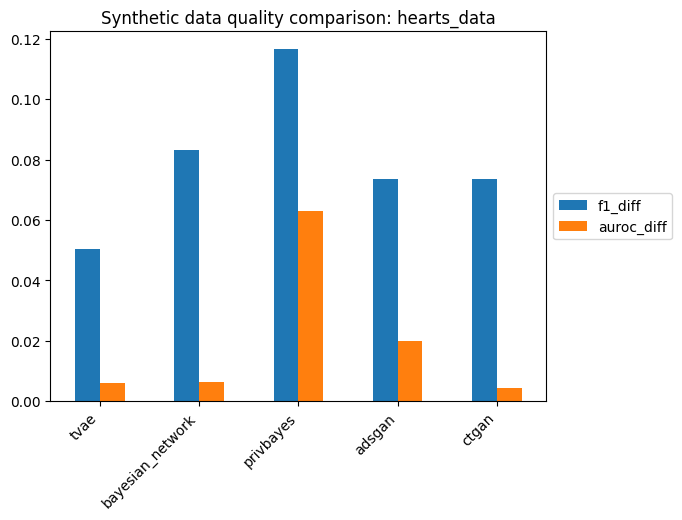

In [8]:
results_f1.plot.bar()
plt.title("Synthetic data quality comparison: hearts_data")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [9]:
privacy_results = pd.DataFrame(columns=["eps_identif_risk",
                                        "mia_cls_risk",
                                        "att_discl_risk"])

for i in range(len(gen_methods)):
    eval = state[i].eval.set_index("metric")
    privacy_results.loc[gen_methods[i]] = [eval.loc["eps_identif_risk", "val"],
                                            eval.loc["mia_cls_risk", "val"],
                                            eval.loc["att_discl_risk", "val"]]
privacy_results

,eps_identif_risk,mia_cls_risk,att_discl_risk
tvae,0.127101,0.860504,0.488305
bayesian_network,0.256303,0.996639,0.489286
privbayes,0.116597,0.914286,0.422549
adsgan,0.121849,0.963025,0.466036
ctgan,0.118697,0.994958,0.471218


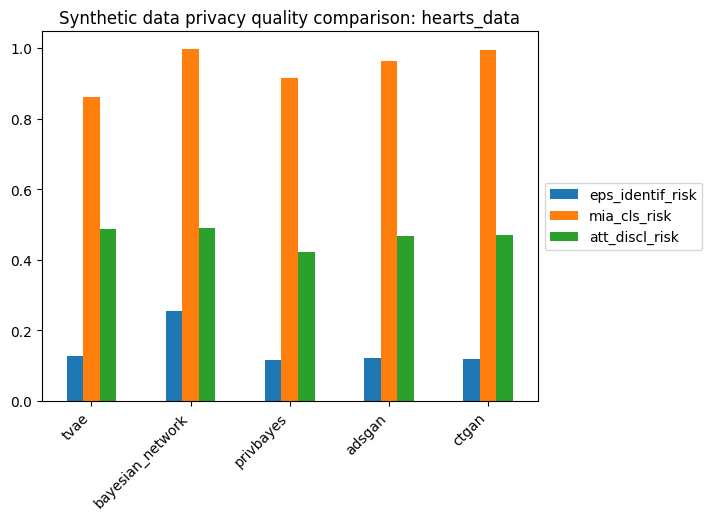

In [10]:
privacy_results.plot.bar()
plt.title("Synthetic data privacy quality comparison: hearts_data")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [11]:
utility_results = pd.DataFrame(columns=["avg_dwm_diff",
                                        "pca_eigval_diff",
                                        "pca_eigvec_ang"])

for i in range(len(gen_methods)):
    eval = state[i].eval.set_index("metric")
    utility_results.loc[gen_methods[i]] = [eval.loc["avg_dwm_diff", "val"],
                                            eval.loc["pca_eigval_diff", "val"],
                                            eval.loc["pca_eigvec_ang", "val"]]
utility_results

,avg_dwm_diff,pca_eigval_diff,pca_eigvec_ang
tvae,0.010847,0.061458,0.194701
bayesian_network,0.010872,0.077040,0.647133
privbayes,0.052201,0.156885,1.410577
adsgan,0.028494,0.034162,0.131892
ctgan,0.035699,0.032129,0.130162


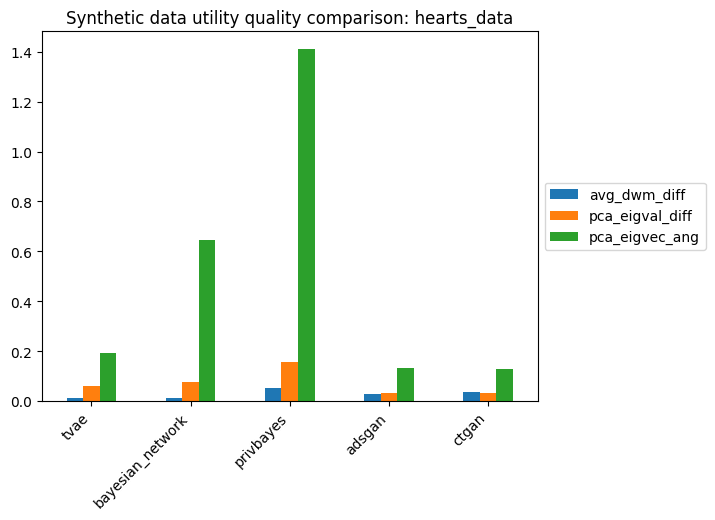

In [12]:
utility_results.plot.bar()
plt.title("Synthetic data utility quality comparison: hearts_data")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [13]:
matrix_results = pd.DataFrame(columns=["corr_mat_diff",
                                        "mutual_inf_diff"])

for i in range(len(gen_methods)):
    eval = state[i].eval.set_index("metric")
    matrix_results.loc[gen_methods[i]] = [eval.loc["corr_mat_diff", "val"],
                                            eval.loc["mutual_inf_diff", "val"]]
matrix_results

,corr_mat_diff,mutual_inf_diff
tvae,0.465359,1.344916
bayesian_network,1.051326,1.466979
privbayes,1.311684,0.596596
adsgan,0.364008,1.393163
ctgan,0.352115,1.361350


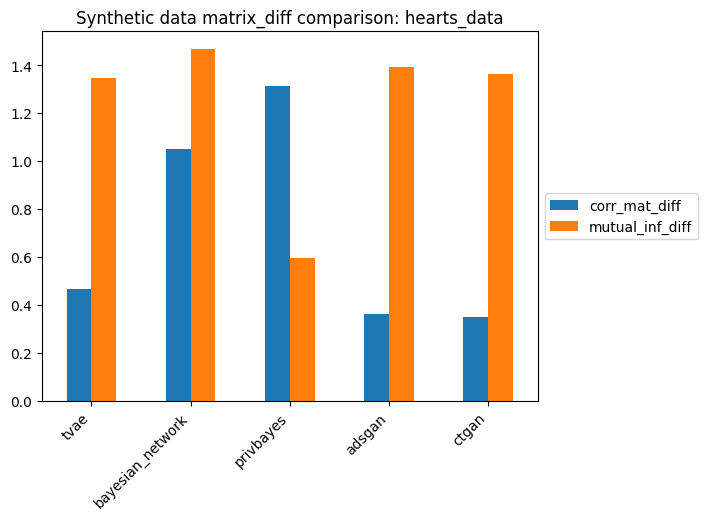

In [14]:
matrix_results.plot.bar()
plt.title("Synthetic data matrix_diff comparison: hearts_data")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()